# Kryptosystem Pailliera
Został opracowany przez Pascala Pailliera w 1999 roku.
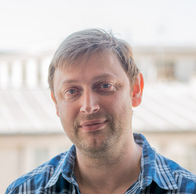
International Association for Cryptologic Research:
https://www.iacr.org/cryptodb/data/author.php?authorkey=444 \
Jest to addytywny kryptosystem homomorficzny. Znaczy to, że posiadając klucz publiczny i dwa szyfrogramy z wiadomości $m1$ i $m2$, można wyliczyć sumę wiadomości $m1+m2$.
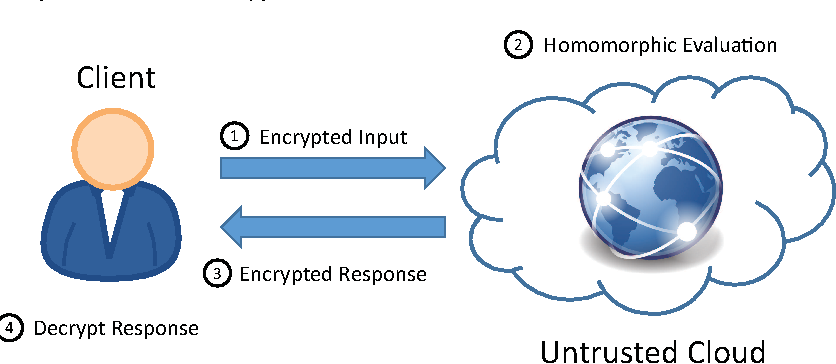

Kryptosystem ten jest probalistycznym algorytmem asymetrycznym z kluczem publicznym i prywatnym. Bezpieczeństwo oparte jest na problemie obliczenia $n$-tej klasy reszt co uważane jest za obliczeniowo trudne. 
Założenie to oparte jest o $DCRA$ (decisional composite residuosity assumptio).
Nieformalnie $DCRA$ stwierdza, że biorąc pod uwagę złożoną liczbę $n$:

\$ n = p * q$ 

i liczbę całkowitą $z$, trudno jest zdecydować, czy $z$ jest $n$ resztowe modulo $n^2$. To znaczy. czy istnieje taki $y$, że:

$ z \equiv y^n$ &nbsp;$(mod$&nbsp; $n^2) $

# Algorytm
## Generacja klucza
1. Wybranie dwóch losowych dużych liczb pierwszych o równej długości.<br>
$p\neq q$

In [1]:
def getRandom():
    tmp = 0;
    while (tmp == 0):
        r = ZZ.random_element(2^511, 2^512)
        # losowa liczba 512 bitów
        if is_prime(r):
            tmp = 1
    return r

p = getRandom()
q = getRandom()
# p i q nie mogą być takie same
while (p == q):
    p = getRandom()

print(f"p={p},\nq={q}")

p=11121007699822088446569996848968203218080849453490247965537780868703825469363357662529303435223039641714945885539885008113720330384203473992338052813043403,
q=11502184474644460056265125257002738174387230069884673402195422147932994382041097954667935716914235986708493048343996583940257839051171094076361159971463769


2. Wyliczenie iloczynu liczb pierwszych oraz ich najmniejszej wspólnej wielokrotności - $lcm$ (Least Common Multiple).<br>
$n = p * q $ <br>
$\lambda = lcm(p-1, q-1)$

In [2]:
def gcd(a,b):
    """Największy wspólny dzielnik a i b"""
    while b > 0:
        a, b = b, a % b
    return a
    
def lcm(a, b):
    """Najmniejsza wspólna wielokrotność a i b"""
    return a * b // gcd(a, b)

n = p * q
lambdan = lcm(p - 1, q - 1)
print(f"n={n},\nlambda={lambdan}")

n=127915882107295123540344430645289204464009696867882761443048979372563431000877818754806336233236001566159993538975613876482645415856460259615988600575364871231959200638352304604716992766983637599046844123007869146121265256293984487407718913650047132205168548359802679691521231104141141090288478264273638965907,
lambda=21319313684549187256724071774214867410668282811313793573841496562093905166812969792467722705539333594359998923162602312747107569309410043269331433429227474768127837695300633628265814466007040855161220124681083568819708103245688847158683619401815832488256687486811465968321529520995284285953401594176809076456


3. Wybór liczby całkowitej $g$ należącej do $\mathbb{Z}_{n^2}^{*}$, takiej że będzie ona względnie pierwsza z \\(n^2\\). Alternatywnie, gdy $p$ i $q$ są równej długości pod względem bitów za $g$ można podstawić $n + 1$

In [3]:
g = randint(n+1,n*n-1)
# g musi być względnie pierwsza do n*n
while (gcd(g,n*n)!=1):
    g = randint(n+1,n*n-1)

# g = randint(n+1,n*n-1)
print(f"g={g}")

g=1849735786656876327607424961091981519722362745151225679957694050989257268883185816063356650234395264668503080812792115763385112788832624317917129832460891466217523366688220189077767198249518923952453948725886921347139992766332103455693429088082576320827734814973235458142328034586044719390430352409383386344255999966387196437715466696804500760564940914902308785233942863129335346827502531272511805975498445669538487028462074413387360789350266780349022545090526887273135203316122308010082916698956392735967536657800087214814657154752661441424675337492081263034349355673088562362443912252050544041259597070147000583717


4. Wyliczanie modularnej odwrotności multiplikatywnej $\mu$ (to jest równoznacze, że $n$ dzieli $ord(g)$)  \
$\mu = (L(g^{\lambda}$&nbsp;$mod$&nbsp;$n^{2})^{-1}$&nbsp;$mod$&nbsp;$n$\
$L(x)=\frac{x-1}{n}$

In [4]:
def L(x):
    return (x-1)//n 
u = L(pow(int(g), int(lambdan), int(n*n))) # u = L(g^lambda)mod n^2
u = pow(u,-1, n) # u = (L(g^lambda)mod n^2)^(-1) mod n
print(f"u={u}")

u=9896676330376041639728158234743736417769409495696246317630309563897206370283258011768628297571862857227169407484204396822316949823760050861602292816801854355408232586350067872071889449110593510956777921764533504466466404239292744276905381949230132403728486735492817114470853532605069208559991782279295521104


- Kluczem publicznym (szyfrowanie) jest para $(n,g)$
- Kluczem prywatnym (deszyfrowanie) jest para $(\lambda, \mu)$

## Szyfrowanie
1. Ustalenie wiadomości $m$ jako liczby z przedziału $0 \le m < n$\
Załóżmy, że chcemy wysłać wiadomość: 10

In [5]:
m = 10
print(f"m={m}")

m=10


2. Wybór losowego $r$ z przedziału $0 < r < n$. $r$ musi należeć do $\mathbb{Z}_{n}^{*}$ co jest równoznacze z tym, że musi spełniać: $gcd(r,n)=1$

In [6]:
r = randint(20,n)
while(gcd(r,n)!=1):
    r = randint(20,n)
print(f"r={r}")

r=93091724614693821503194266074128882245622708025958443376850358678522184018560662478329960979249541372661097622853985674083988403182566858445428746619484679796654940183018071586683598138176891166501280784721614891786482613315124614335861826660995548485015732383275695691424105145485389159171086491075387113587


3. Wyliczenie szyfrogramu
$c = g^m * r^n$&nbsp;$mod$&nbsp;$n^2$

In [7]:
# wszystko w mod n^2
k1 = pow(g, m, n*n) # g^m mod n^2
k2 = pow(r, n, n*n) # r^n mod n^2
cipher = (k1 * k2) % (n*n) # g^m * r^n mod n^2
print(f"szyfrogram={cipher}")

szyfrogram=15853840485773252726419509096586301101805138665134447909414887879989809900574777486731850152894031226117819944984460492269613296741684353553368119717766232720114305622791615322697691205819741121383810201332846057071397513954814436402326193723192113129071371989095331255851042908039196009559330059187777440503661360065986469572395560318519483044718138025526005599787222416552375568921453881413188533224059901079664586249233989732467172990951180200579128205811051368505597289190197629001350085190916035984479203507718552684941681852767558690828092163872755317895756527203715491459310597417277898552599869993722917632181


## Deszyfrowanie
1. Niech szyfrogram $c \in \mathbb{Z}_{n^2}^{*}$ 

2. Wiadomość $m$ wylicza się z użyciem klucza prywatnego $(\lambda, \mu)$ według formuły:\
$m = L(c^{\lambda}$&nbsp;$mod$&nbsp;$n^{2})*\mu$&nbsp;$mod$&nbsp;$n$

In [8]:
msg = L(pow(int(cipher), int(lambdan), int(n*n))) * u % n # m = L(c^lambda mod n^2) * u mod n
print(f"Odszyfrowana wiadomość = {msg}")

Odszyfrowana wiadomość = 10


# Właściwości homomorficzne
Godną uwagi cechą kryptosystemu Pailliera są jego homomorficzne właściwości. Ponieważ funkcja szyfrowania jest addytywnie homomorficzna, można opisać następujące tożsamości:
#### 1. Homomorficzne dodawanie tekstów jawnych
Produkt mnożenia dwóch szyfrogramów po zdeszyfrowaniu równy jest sumie tekstów jawnych.\
$D(E(m1,r1) * E(m2, r2)$&nbsp;$mod$&nbsp;$n^2) = m1+m2$\
Weźmy dwie wiadomości $m1=4$ i $m2=6$. Następnie zaszyfrujmy je, a szyfrogramy nazwijmy $c1$ i $c2$.

In [9]:
m1 = 4
m2 = 6

# Wybór dwóch losowych r
r1, r2 = randint(20,n), randint(20,n)
while(gcd(r1,n)!=1 or gcd(r2,n)!=1):
    r1, r2 = randint(20,n), randint(20,n)
# g^m mod n^2
k1m1 = pow(g, m1, n*n) 
k1m2 = pow(g, m2, n*n)
# r^m mod n^2    
k2m1 = pow(r1, n, n*n) 
k2m2 = pow(r2, n, n*n)

c1 = (k1m1 * k2m1) % (n*n) # szyfrogram pierwszej wiadomości
c2 = (k1m2 * k2m2) % (n*n) # szyfrogram drugiej wiadomości
print(f"m1 :{m1}\n"
      f"m2 :{m2}\n"
      f"c1 :{c1}\n"
      f"c2 :{c2}")

m1 :4
m2 :6
c1 :8769629314360196792923408021639045953582060618496799844871977801827507983270216484229097588183494807106088151106877085531995722868299061791638697466939061428440338701738567116628987074722575913597432987923063361031432241444483009689198951110881989515059936363177368146210946376742745883937532685109145751524439978227868401651088690115021337405704942544713898713090628879278648096868603567761604664140240685736393622066908063108340016203440759991137698796255343037997116076606661623996678819101218147029174620064563693442073169208187850318140024702571283302794079615745686381677793946060387298666350296204962796612222
c2 :112152802534090618256771443959000420953131509726168438851046258584650893834870660526841502909233341924914599166492968093719988161233217430834777166821226939479770866208467361005858066281203813213139482560405539684326396131973179208205752471290042947820478023253900314366914271389932172670094397665435253919586174519458180304040635965585606998885289016311780497618

Pomnóżmy szyfrogramy w $\mathbb{Z}_{n^2}^{*}$,

In [10]:
# Mnożenie szyfrogramów
c_prod = (c1*c2) % (n*n)
print("c1 * c2 mod n^2 : ",c_prod)

c1 * c2 mod n^2 :  7711282160050558983253645325707528854192396343739759404656966303559280900185837678796027984753765109536315476007678108485566336510106538642510487385546409479024545420853202694464123369187579639443988655243244539303182148016128533543168319435659210314409930808379858740961588782956183121773528021639119501693427749372963906798593346868813300704851866994678425567804115168057344615936956192259974053101868681185481769970325525963546868160869075045753032224261504316472636832869027191090859622183139921483294601337981844610608566399304237922557366726535835470742662448834610856679430453662121366459340037765072379124795


a następnie odszyfrujmy wynik mnożenia:

In [11]:
dec = L(pow(int(c_prod), int(lambdan), int(n*n))) * u % n # dec = L(c^lambda mod n^2) * u mod n
print("dec(c1 * c2 mod n^2) : ",dec)

dec(c1 * c2 mod n^2) :  10


Iloczyn pierwszej  zaszyfrowanej wiadomości z $g$ podniesionym o potęgi drugiej wiadomości również odszyfruje się do sumy tekstów jawnych\
$D(E(m1,r1) * g^{m2}$&nbsp;$mod$&nbsp;$n^2) = m1+m2$

In [12]:
c = (k1m1 * k2m1)*g^m2 % (n*n) # szyfrogram pierwszej wiadomości pomnożonej przez g podniesionej o potęgi drugiej wiadomości
print("c1 * g^m2 mod n^2 : ",c)

c1 * g^m2 mod n^2 :  7506278170486612383735944683723486134466385972413057038339057220594181577076171279193107981883051055261422222093036329957630059442455315453312586847207393690907071736472480636294965012352618366312379681006537863717361527873415008966476363341028941815696038910787922609291556490129301043635904905984650899037217078738160952286823769009734314836978763602401891317772027630694148947965433602802325340359244007052054618704299970696639411295346999881964480380616665061973171654150371383404265068788527085331306854907762693632513747410339419397795852527806420219579784502918068779098435373271873573838327686442352720276203


In [13]:
dec = L(pow(int(c), int(lambdan), int(n*n))) * u % n # dec = L(c^lambda mod n^2) * u mod n
print("dec(c1 * g^m2 mod n^2) : ",dec)

dec(c1 * g^m2 mod n^2) :  10


#### 1. Homomorficzne mnożenie tekstu jawnego
$D(E(m1,r1)^{m2}$&nbsp;$mod$&nbsp;$n^2) = m1*m2$\
Weźmy szyfrogram pierwszej wiadomości $m1$ i podnieśmy go do potęgi drugiej $m2$.

In [14]:
c1 = (k1m1 * k2m1)^m2 % (n*n)
print(f"m1 :{m1}\n"
      f"m2 :{m2}\n"
      f"c1^m2 mod n^2 :{c1}")

m1 :4
m2 :6
c1^m2 mod n^2 :6580011136044886021401600360160572552291856086823791784592223078249375195158054619113710161937898727892213520518003004045634254351684696427445988882449016593814577318100282617268935031383032107577776991509991060228863234789537236294880003907995063055022336068006610941479316735026781075938800214489969238640769328124390544120998310304951153438703404167518864985700664247133040408921450863288086441368735047744779996503918668353111259515183419496859903640313551260682277176801296319073740565390318142791421904133683834008014879046448507008476326144093459298165932974491589649202611622740370203915387090802117153997740


In [15]:
dec1 = L(pow(int(c1), int(lambdan), int(n*n))) * u % n 
print(f"dec(c1^m2 mod n^2) : {dec1}\n")

dec(c1^m2 mod n^2) : 24



Ogólnie zaszyfrowana wiadomość podniesiona do pewnej stałej $k$ po zdeszyfrowaniu równa się iloczynowi tekstu jawnego i stałej $k$, co wyrażone jest wzorem:
$D(E(m1,r1)^k$&nbsp;$mod$&nbsp;$n^2) = k*m1$\
Przykładowo dla pewnych $k$:

In [16]:
k = [1, 2, 5, 10, 20]

print(f"m1 :{m1}\n")

for ki in k:
    c = (k1m1 * k2m1)^ki % (n*n)
    dec = L(pow(int(c), int(lambdan), int(n*n))) * u % n 
    print(f"k : {ki}\n"
          f"c^{ki} mod n^2 : {str(c)[:6]}...\n"
          f"dec(c^{ki} mod n^2) : {dec}\n")

m1 :4

k : 1
c^1 mod n^2 : 876962...
dec(c^1 mod n^2) : 4

k : 2
c^2 mod n^2 : 108388...
dec(c^2 mod n^2) : 8

k : 5
c^5 mod n^2 : 749014...
dec(c^5 mod n^2) : 20

k : 10
c^10 mod n^2 : 957463...
dec(c^10 mod n^2) : 40

k : 20
c^20 mod n^2 : 128196...
dec(c^20 mod n^2) : 80



# Idea
Kryptosystem Pailliera wykorzystuje fakt, że niektóre logarytmy dyskretne można łatwo obliczyć.

Z twierdzenia o dwumianie Newtona
$(1+n)^x = \sum_{k=0}^{x}\binom{x}{k}n^k = 1+nx + \binom{x}{2}n^2+...$


wynika kongruencja\
$(1+n)^x \equiv 1+nx$&nbsp;$(mod$&nbsp;$n^2)$

oznaczmy lewą stronę\
$y=(1+n)^x$

wówczas \
$ y \equiv 1+nx$&nbsp;$(mod$&nbsp;$n^2)$

więc\
$ x \equiv \frac{y-1}{n} $&nbsp;$(mod$&nbsp;$n^2)$

stąd wynika używana w deszyfrowaniu funkcja \
$L(x)=\frac{x-1}{n}$
- Kluczem prywatnym (deszyfrowanie) jest para $(\lambda, \mu)$\
$c = g^m * r^n$&nbsp;$mod$&nbsp;$n^2$\
$\lambda = lcm(p-1, q-1)$\
$\mu = (L(g^{\lambda}$&nbsp;$mod$&nbsp;$n^{2})^{-1}$&nbsp;$mod$&nbsp;$n$\
$m = L(c^{\lambda}$&nbsp;$mod$&nbsp;$n^{2})*\mu$&nbsp;$mod$&nbsp;$n$

# Zastosowanie 
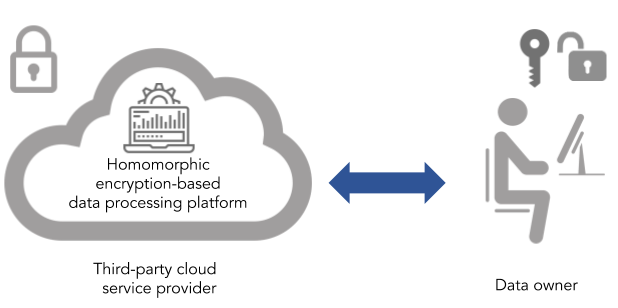
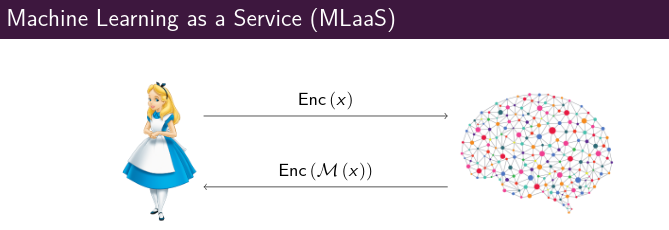
## Elektroniczne systemy głosowania
Powyższe właściwości homomorficzne mogą być wykorzystane w bezpiecznych elektronicznych systemach głosowania. Rozważmy proste głosowanie binarne („za” lub „przeciw”). Niech m wyborców odda głos 1 (za) lub 0 (przeciw). Każdy wyborca szyfruje swój wybór przed oddaniem głosu. Urzędnik wyborczy bierze wynik m zaszyfrowanych głosów, a następnie odszyfrowuje wynik i uzyskuje wartość n, która jest sumą wszystkich głosów. Urzędnik wyborczy wie wtedy, że n osób głosowało za, a $m-n$ osób głosowało przeciw. Rola losowego $r$ zapewnia, że dwa równoważne głosy zostaną zaszyfrowane do tej samej wartości, zapewniając w ten sposób prywatność wyborcom.
## Elektroniczna gotówka
Inną cechą kryptosystemu jest pojęcie samoślepienia. Jest to możliwość zmiany jednego zaszyfrowanego tekstu na inny bez zmiany treści jego deszyfrowania. Ma to zastosowanie do rozwoju e-gotówki. Przypadek użycia jest taki, że płacimy za przedmiot w trybie online, a sprzedawca nie musi znać numeru karty kredytowej, a tym samym tożsamości kupującego. Celem jest zapewnienie poprawności i ważności transferu, przy jednoczesnym nieujawnianiu tożsamości osoby, z którą jest kojarzona.

Źródła:
1. https://en.wikipedia.org/wiki/Paillier_cryptosystem
2. https://www.cs.tau.ac.il/~fiat/crypt07/papers/Pai99pai.pdf

# Przegląd bibliotek szyfrowania homomorficznego
### Microsoft Seal 
Biblioteka oparta na technologii szyfrowania homomorficznego (open source) - zapewnia zestaw bibliotek , które umożliwiają wykonywanie obliczeń bezpośrednio na zaszyfrowanych danych. Microsoft SEAL napisany jest w C++, ale udostępnia interfejs API i powstały wrappery na inne języki jak C# (oficjalny), python, javascript. Posiada algorytmy symetryczne i asymetryczne.
Można wybrać 2 schematy działania:
1. BFV umożliwia wykonywanie arytmetyki modularnej na zaszyfrowanych liczbach całkowitych. W przypadku zastosowań, w których wymagane są dokładne wartości, jedynym wyborem jest schemat BFV.
  
2. CKKS umożliwia dodawanie i mnożenie zaszyfrowanych liczb rzeczywistych lub zespolonych, ale daje tylko przybliżone wyniki. W zastosowaniach takich jak sumowanie zaszyfrowanych liczb rzeczywistych, ocena modeli uczenia maszynowego na zaszyfrowanych danych lub obliczanie odległości między punktami współrzędnych CKKS jest najlepszym wyborem.<a/>

Możliwości:
 - operacje arytmetyczne na szyfrogramach - mnożenie, dodawanie, negację, odejmowanie, podnoszenie do kwadratu, potęgowanie
 - relinearyzacja - pobiera na wejściu szyfrogram rozmiaru i klucz relinearyzacji. Dzięki temu możliwe jest zredukowanie rozmiaru szyfrogramów, przeprowadzenie na nich operacji tańszym kosztem i zwrócenie wyniku jak w przypadku przeprowadzania obliczeń na oryginalnych dużych wartościach.
 - rotacje kolumn i rzędów zaszyfrowanych macierzy!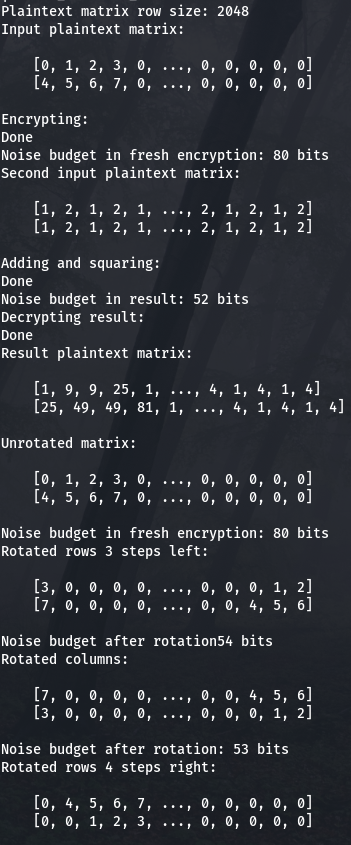

### Concrete
Concrete to w pełni homomorficzna biblioteka szyfrowania napisana w Rust. Oparta jest na problemie LWE (learning with errors). Oprócz dodawania i mnożenia szyfrogramów umożliwia załączenie wykonania funkcji na szyfrogramie w taki sposób, że:<br>
$f(E(m)) = E(f(m))$ <br>
Istnieje jednak ryzyko modyfikacji klucza szyfrowania i przesunięcia paddingu. Oprócz tego posiada też funkcję tzw. bootstrappingu. Szyfrogramy utworzone z użyciem szyfrowania homomorficznego mają miarę nazywaną hałasem. Po zaszyfrowaniu hałas jest niski, jednak po każdej wykonanej operacji na szyfrogramie hałas rośnie. Im jest on większy tym dłużej trwają operację na szyfogramach - koszt wykonania jest większy, a z czasem już nie można prawidłowo ich wykonać. Bootstrapping to funkcja, która redukuje ten hałas do wartości po pierwszym zaszyfrowaniu.<br>
$E(m)_{noisy} \rightarrow E(m)_{clean}$
### HElib
HElib to biblioteka oprogramowania typu open source napisana w C++ ale z użyciem matematyczenj biblioteki NTL. Implementuje "assembly" dla szyfrowania homomorficznego czyli procedury niskiego poziomu jak ustawianie i przesuwanie bitów, dodawanie, mnożenie itp. Oprócz tego zawiera schematy CKKS i BFV, automatyczne zarządzanie szumami oraz wielowątkowość. Z jej użyciem zaimplementowano IBM FHE (fully homomorphic encryption) - czyli zestaw toolkit'ów do budowania aplikacji na iOS, Mac OS, Unix i Anroidzie. Rozszerza operacje z HElib do zastosowań w uczeniu maszynowym i przetwarzaniu chmurowym.

### PALISADE
PALISADE to projekt open source od agencji DARPA napisany w C++, który zawiera implementacje bloków kryptografii kratowej i  schematów szyfrowania homomorficznego. Zapewnia modułowość, obsługę wielu platform, integrację akceleratorów sprzętowych, szyfrowanie post-kwantowe klucza publicznego oraz obsługę największej liczby schematów szyfrowania homomorficznego: BGV, BFV (arytmetyka na liczbach całkowitych), CKKS (arytmetyka na liczbach zmiennoprzecinkowych i całkowitych) i FHEW (obwody boolowskie, FPGA). Zespół PALISADE prowadzi regularne seminaria internetowe na temat FHE i PALISADE.
<br>
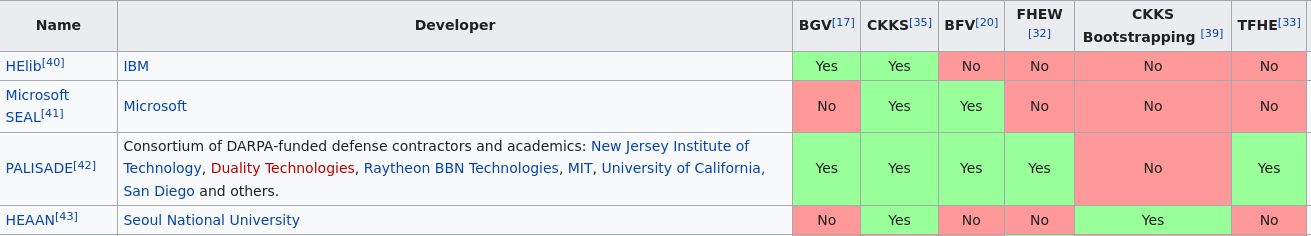

Źródła:
1. https://github.com/Huelse/SEAL-Python/
2. https://github.com/Lab41/PySEAL
3. https://github.com/homenc/HElib
4. https://github.com/zama-ai/concrete
5. https://en.wikipedia.org/wiki/Homomorphic_encryption
6. https://gitlab.com/palisade/palisade-release/-/wikis/home
7. https://github.com/jonaschn/awesome-he
    